In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_FPT = pd.read_csv('/content/drive/My Drive/PNJ.csv')
df_FPT.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2/28/2018 9:15,78.14,78.99,78.14,78.99,270,0
1,PNJ,2/28/2018 9:16,78.94,78.94,78.94,78.94,10,0
2,PNJ,2/28/2018 9:19,78.14,78.14,78.14,78.14,283,0
3,PNJ,2/28/2018 9:20,78.14,78.14,78.14,78.14,480,0
4,PNJ,2/28/2018 9:21,78.14,78.14,78.14,78.14,146,0


In [ ]:
df_FPT['Date/Time']=pd.to_datetime(df_FPT['Date/Time'],infer_datetime_format=True) # định dang lại cấu trúc thời gian
df_FPT.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2018-02-28 09:15:00,78.14,78.99,78.14,78.99,270,0
1,PNJ,2018-02-28 09:16:00,78.94,78.94,78.94,78.94,10,0
2,PNJ,2018-02-28 09:19:00,78.14,78.14,78.14,78.14,283,0
3,PNJ,2018-02-28 09:20:00,78.14,78.14,78.14,78.14,480,0
4,PNJ,2018-02-28 09:21:00,78.14,78.14,78.14,78.14,146,0


In [ ]:
df_FPT['Volatility_Open'] = df_FPT['Open'].diff(periods=-1)
df_FPT['Volatility_High'] = df_FPT['High'].diff(periods=-1)
df_FPT['Volatility_Low'] = df_FPT['Low'].diff(periods=-1)
df_FPT['Volatility_Close'] = df_FPT['Close'].diff(periods=-1)
df_FPT.tail()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Volatility_Open,Volatility_High,Volatility_Low,Volatility_Close
125304,PNJ,2020-12-22 14:22:00,78.2,78.2,78.2,78.2,5000,0,0.0,0.0,0.0,0.0
125305,PNJ,2020-12-22 14:23:00,78.2,78.2,78.2,78.2,1700,0,0.0,0.0,0.0,0.0
125306,PNJ,2020-12-22 14:24:00,78.2,78.2,78.2,78.2,870,0,0.1,0.1,0.1,0.1
125307,PNJ,2020-12-22 14:25:00,78.1,78.1,78.1,78.1,13000,0,-0.2,-0.2,-0.2,-0.2
125308,PNJ,2020-12-22 14:46:00,78.3,78.3,78.3,78.3,1500,0,NaN,NaN,NaN,NaN


In [ ]:
df_FPT.dropna(inplace= True) # hàm dropna dùng để loại bỏ các dữ liệu missing data
df_FPT.tail()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Volatility_Open,Volatility_High,Volatility_Low,Volatility_Close
125303,PNJ,2020-12-22 14:21:00,78.3,78.3,78.3,78.3,5200,0,0.1,0.1,0.1,0.1
125304,PNJ,2020-12-22 14:22:00,78.2,78.2,78.2,78.2,5000,0,0.0,0.0,0.0,0.0
125305,PNJ,2020-12-22 14:23:00,78.2,78.2,78.2,78.2,1700,0,0.0,0.0,0.0,0.0
125306,PNJ,2020-12-22 14:24:00,78.2,78.2,78.2,78.2,870,0,0.1,0.1,0.1,0.1
125307,PNJ,2020-12-22 14:25:00,78.1,78.1,78.1,78.1,13000,0,-0.2,-0.2,-0.2,-0.2


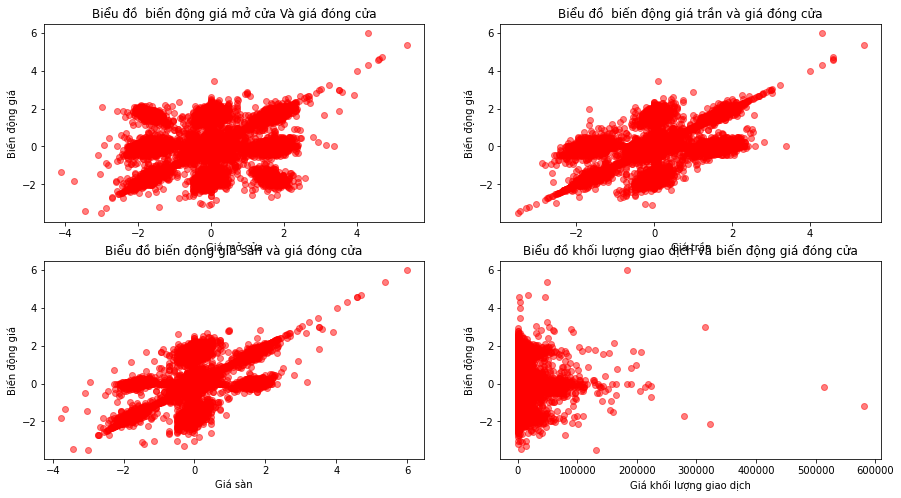

In [ ]:
VO = df_FPT['Volatility_Open'].values
VH = df_FPT['Volatility_High'].values
VL = df_FPT['Volatility_Low'].values
VC = df_FPT['Volatility_Close'].values
V = df_FPT['Volume'].values


plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.scatter(VO,VC, color= 'red',alpha= 0.5)
plt.title('Biểu đồ  biến động giá mở cửa Và giá đóng cửa')
plt.xlabel('Giá mở cửa')
plt.ylabel('Biến động giá')

plt.subplot(2,2,2)
plt.scatter(VH,VC, color= 'red',alpha= 0.5)
plt.title('Biểu đồ  biến động giá trần và giá đóng cửa')
plt.xlabel('Giá trần')
plt.ylabel('Biến động giá')

plt.subplot(2,2,3)
plt.scatter(VL,VC, color= 'red',alpha= 0.5)
plt.title('Biểu đồ biến động giá sàn và giá đóng cửa')
plt.xlabel('Giá sàn')
plt.ylabel('Biến động giá')

plt.subplot(2,2,4)
plt.scatter(V,VC, color= 'red',alpha= 0.5)
plt.title('Biểu đồ khối lượng giao dịch và biến động giá đóng cửa')
plt.xlabel('Giá khối lượng giao dịch')
plt.ylabel('Biến động giá')

plt.show()

In [ ]:
x = df_FPT.drop(columns=['Ticker','Open','High','Low','Close','Open Interest','Volatility_Close'], axis=1)
x.index = x['Date/Time']
x.drop('Date/Time', axis=1, inplace= True)
x = x.values
print(x)

[[ 2.70e+02 -8.00e-01  5.00e-02 -8.00e-01]
 [ 1.00e+01  8.00e-01  8.00e-01  8.00e-01]
 [ 2.83e+02  0.00e+00  0.00e+00  0.00e+00]
 ...
 [ 1.70e+03  0.00e+00  0.00e+00  0.00e+00]
 [ 8.70e+02  1.00e-01  1.00e-01  1.00e-01]
 [ 1.30e+04 -2.00e-01 -2.00e-01 -2.00e-01]]


In [ ]:
y = df_FPT['Volatility_Close'].values
y = y.reshape(-1,1)
print(y)

[[ 0.05]
 [ 0.8 ]
 [ 0.  ]
 ...
 [ 0.  ]
 [ 0.1 ]
 [-0.2 ]]


In [ ]:
x_train = x[:100000]
y_train = y[:100000]
x_test = x[100000:]
y_test = y[100000:]

In [ ]:
std_scale = StandardScaler().fit(x_train)
x_train_scaled = std_scale.fit_transform(x_train)
x_test_scaled = std_scale.fit_transform(x_test)

In [ ]:
lr=LinearRegression()
lr_scaled = lr.fit(x_train_scaled,y_train)
y_train_predict = lr_scaled.predict(x_train_scaled)
print('Độ phù hợp tập train:',r2_score(y_train_predict,y_train))
print('Sai số tuyệt đối trung bình tập train:',mean_squared_error(y_train_predict,y_train))

Độ phù hợp tập train: 0.29882272741146565
Sai số tuyệt đối trung bình tập train: 0.2440937347365322


In [ ]:
y_test_predict = lr_scaled.predict(x_test_scaled)
print(y_test_predict)


[[-0.17572942]
 [-0.08828803]
 [-0.17750549]
 ...
 [ 0.00508047]
 [ 0.46349942]
 [-0.91733442]]


<ipython-input-86-fe89e609a73f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_datal['Dự đoán']= y_train_predict
<ipython-input-86-fe89e609a73f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_datal['Dự đoán']= y_test_predict


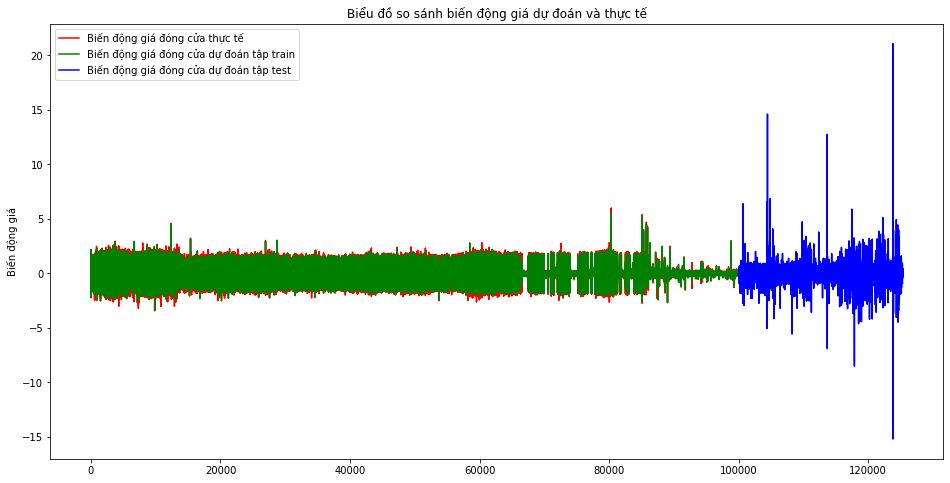

In [ ]:
train_datal=df_FPT[:100000]
test_datal=df_FPT[100000:]

plt.figure(figsize= (16,8))
plt.plot(y, label= 'Biến động giá đóng cửa thực tế', color= 'red')
train_datal['Dự đoán']= y_train_predict
plt.plot(train_datal['Dự đoán'], label= 'Biến động giá đóng cửa dự đoán tập train', color= 'green')
test_datal['Dự đoán']= y_test_predict
plt.plot(test_datal['Dự đoán'], label= 'Biến động giá đóng cửa dự đoán tập test', color= 'blue')
plt.title('Biểu đồ so sánh biến động giá dự đoán và thực tế')
plt.ylabel('Biến động giá')
plt.legend()
plt.show()

In [ ]:
print('Độ phù hợp tập test:',r2_score(y_test_predict,y_test))
print('Sai số tuyệt đối trung bình tập test:',mean_squared_error(y_test_predict,y_test))

Độ phù hợp tập test: 0.33779147373018503
Sai số tuyệt đối trung bình tập test: 0.2315446752668984
